In [ ]:
# prompt: connect google drive

from google.colab import drive
drive.mount('/content/drive')
# data = pd.read_csv('/content/drive/My Drive/Stock new/dataset/nifty51.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
486,12-Jul-24,24387.95,24592.20,24331.15,24502.15,325823474.0,39565.33
487,15-Jul-24,24587.60,24635.05,24522.75,24586.70,305395934.0,31593.04
488,16-Jul-24,24615.90,24661.25,24587.65,24613.00,283212233.0,28668.71
489,18-Jul-24,24543.80,24837.75,24504.45,24800.85,350924425.0,40477.17
490,19-Jul-24,24853.80,24854.80,24508.15,24530.90,343772965.0,33588.08


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
486,12-Jul-24,24387.95,24592.20,24331.15,24502.15,325823474.0,39565.33
487,15-Jul-24,24587.60,24635.05,24522.75,24586.70,305395934.0,31593.04
488,16-Jul-24,24615.90,24661.25,24587.65,24613.00,283212233.0,28668.71
489,18-Jul-24,24543.80,24837.75,24504.45,24800.85,350924425.0,40477.17
490,19-Jul-24,24853.80,24854.80,24508.15,24530.90,343772965.0,33588.08


Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')
0    15-Jul-22
1    18-Jul-22
2    19-Jul-22
3    20-Jul-22
4    21-Jul-22
Name: Date, dtype: object
Mean Squared Error: 14016.222088359165


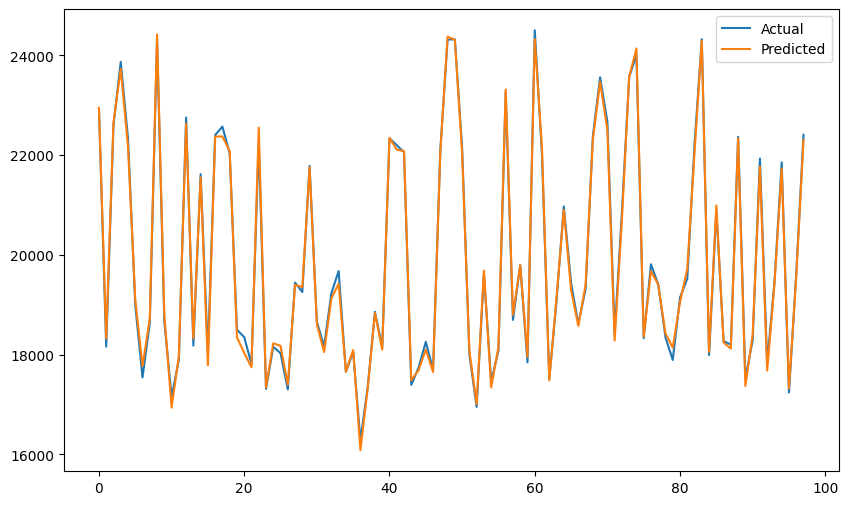

Mean Residual Squared: 26629.382202867884
Standard Error of Predictions: [[166.33510697]]
Margin of Error: [[87.22621538]]
Next Day Predicted Close Price: 24814.36305838128
40% Confidence Interval: [[24727.136843], [24901.58927376]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats

# Load data
data = pd.read_csv('india.csv')  # Replace with your actual data loading method

# Print column names to check for any issues
print(data.columns)

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Check if 'Date' column exists after stripping spaces
if 'Date' in data.columns:
    # Check the first few dates to identify the format
    print(data['Date'].head())

    # Try different formats if necessary
    try:
        data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%Y')
    except ValueError:
        try:
            data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
        except ValueError:
            try:
                data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
            except ValueError:
                # Add more formats as needed
                raise ValueError("Date format is not recognized. Please check the date format in your dataset.")

    # Sort data by date
    data = data.sort_values(by='Date')

    # Set Date as index
    data.set_index('Date', inplace=True)

    # Fill any missing values (if any)
    data.fillna(method='ffill', inplace=True)

    # Create a new column for the target variable (next day's closing price)
    data['Target'] = data['Close'].shift(-1)

    # Drop the last row as it won't have a target value
    data.dropna(inplace=True)

    # Features: You can add more features
    features = ['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (₹ Cr)']
    X = data[features]
    y = data['Target']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model Selection and Training
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Model Evaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.legend()
    plt.show()

    # Predict the next day's closing price and calculate confidence intervals
    next_day_features = X.iloc[-1].values.reshape(1, -1)
    next_day_prediction = model.predict(next_day_features)

    # Calculate residuals
    predictions = model.predict(X_train)
    residuals = y_train - predictions

    # Calculate the standard error of the predictions
    mean_residual_squared = np.mean(residuals**2)
    print(f'Mean Residual Squared: {mean_residual_squared}')  # Debugging line

    X_train_with_const = np.column_stack([np.ones(X_train.shape[0]), X_train])
    X_new_with_const = np.column_stack([1, next_day_features])
    cov_matrix = np.linalg.inv(np.dot(X_train_with_const.T, X_train_with_const))
    se_of_predictions = np.sqrt(mean_residual_squared * (1 + np.dot(np.dot(X_new_with_const, cov_matrix), X_new_with_const.T)))

    print(f'Standard Error of Predictions: {se_of_predictions}')  # Debugging line

    # Confidence level (e.g., 40%)
    confidence_level = 0.40
    z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    margin_of_error = z_score * se_of_predictions

    print(f'Margin of Error: {margin_of_error}')  # Debugging line

    lower_bound = next_day_prediction - margin_of_error
    upper_bound = next_day_prediction + margin_of_error

    print(f'Next Day Predicted Close Price: {next_day_prediction[0]}')
    print(f'{int(confidence_level * 100)}% Confidence Interval: [{lower_bound[0]}, {upper_bound[0]}]')
else:
    print("The 'Date' column is not found in the dataframe.")


In [ ]:
 print(f'Next Day Predicted Close Price: {next_day_prediction[0]}')
 print(f'{int(confidence_level * 100)}% Confidence Interval: [{lower_bound[0]}, {upper_bound[0]}]')

Next Day Predicted Close Price: 24814.36305838128
40% Confidence Interval: [[24727.136843], [24901.58927376]]


In [ ]:
data

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),Target
Date,,,,,,,
2022-07-15,16010.80,16066.95,15927.30,16049.20,205768079.0,17031.43,16278.50
2022-07-18,16151.40,16287.95,16142.20,16278.50,227744850.0,19420.93,16340.55
2022-07-19,16187.05,16359.50,16187.05,16340.55,222630928.0,18068.59,16520.85
2022-07-20,16562.80,16588.00,16490.95,16520.85,284359582.0,22061.81,16605.25
2022-07-21,16523.55,16626.95,16483.90,16605.25,243625339.0,20603.17,16719.45
...,...,...,...,...,...,...,...
2024-07-11,24396.55,24402.65,24193.75,24315.95,306404194.0,32115.44,24502.15
2024-07-12,24387.95,24592.20,24331.15,24502.15,325823474.0,39565.33,24586.70
2024-07-15,24587.60,24635.05,24522.75,24586.70,305395934.0,31593.04,24613.00


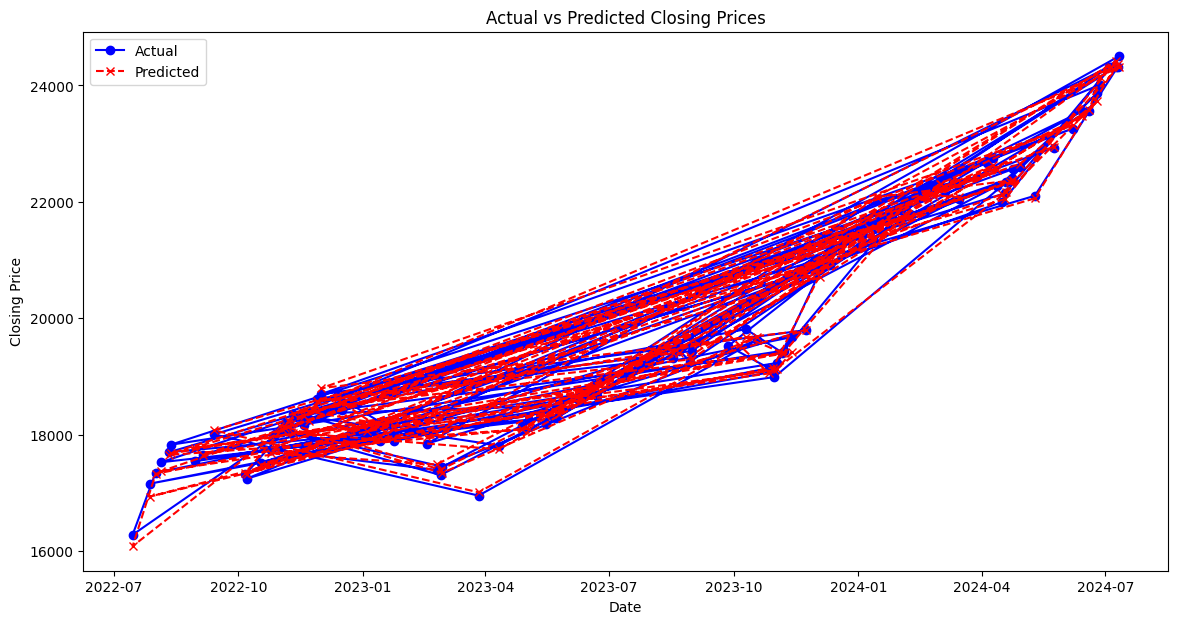

In [ ]:
    plt.figure(figsize=(14, 7))
    plt.plot(y_test.index, y_test.values, label='Actual', marker='o', linestyle='-', color='b')
    plt.plot(y_test.index, y_pred, label='Predicted', marker='x', linestyle='--', color='r')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title('Actual vs Predicted Closing Prices')
    plt.legend()
    plt.show()


Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')
0    15-Jul-22
1    18-Jul-22
2    19-Jul-22
3    20-Jul-22
4    21-Jul-22
Name: Date, dtype: object
Mean Squared Error for Open Price: 7638.572297678255
Mean Squared Error for Close Price: 14016.222088359165


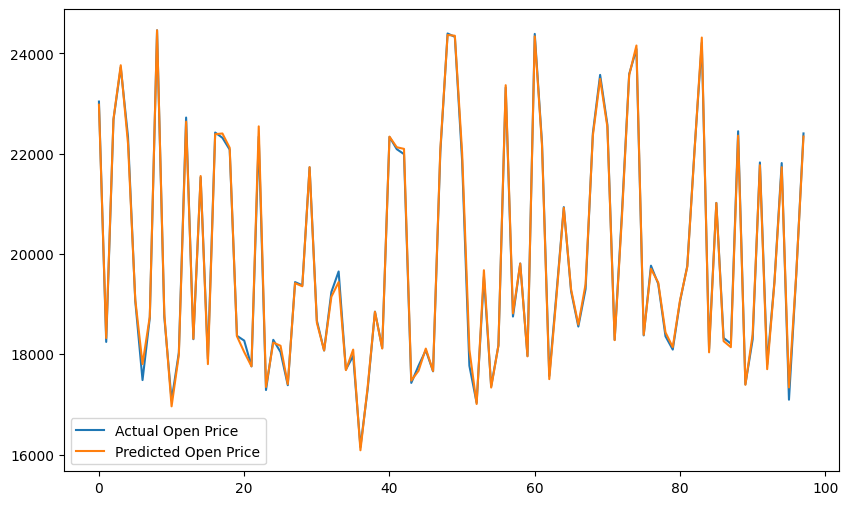

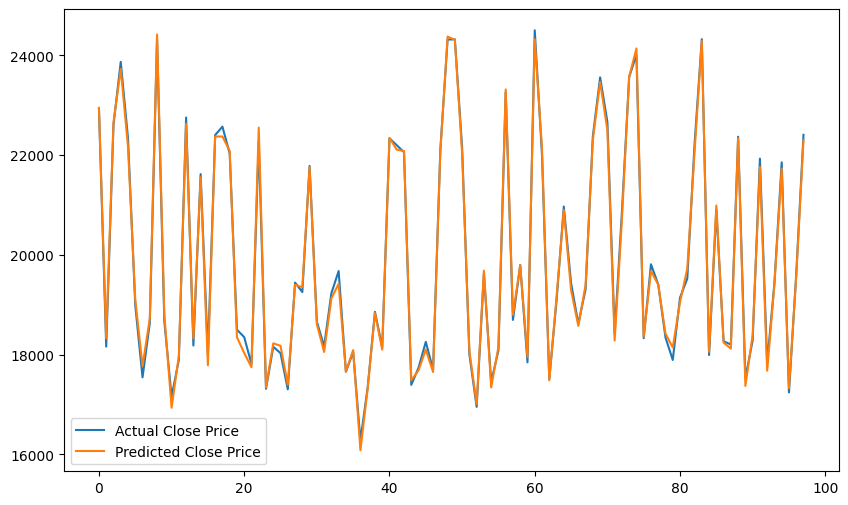

Mean Residual Squared for Open Price: 8126.242644535718
Standard Error of Predictions for Open Price: [[91.88577217]]
Mean Residual Squared for Close Price: 26629.382202867884
Standard Error of Predictions for Close Price: [[166.33510697]]
Margin of Error for Open Price: [[48.18494604]]
Margin of Error for Close Price: [[87.22621538]]
Next Day Predicted Open Price: 24856.749691000532
40% Confidence Interval for Open Price: [[24808.56474496], [24904.93463704]]
Next Day Predicted Close Price: 24814.36305838128
40% Confidence Interval for Close Price: [[24727.136843], [24901.58927376]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats

# Load data
data = pd.read_csv('india.csv')  # Replace with your actual data loading method

# Print column names to check for any issues
print(data.columns)

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Check if 'Date' column exists after stripping spaces
if 'Date' in data.columns:
    # Check the first few dates to identify the format
    print(data['Date'].head())

    # Try different formats if necessary
    try:
        data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%Y')
    except ValueError:
        try:
            data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
        except ValueError:
            try:
                data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
            except ValueError:
                # Add more formats as needed
                raise ValueError("Date format is not recognized. Please check the date format in your dataset.")

    # Sort data by date
    data = data.sort_values(by='Date')

    # Set Date as index
    data.set_index('Date', inplace=True)

    # Fill any missing values (if any)
    data.fillna(method='ffill', inplace=True)

    # Create new columns for the target variables (next day's open and closing prices)
    data['Target_Open'] = data['Open'].shift(-1)
    data['Target_Close'] = data['Close'].shift(-1)

    # Drop the last row as it won't have target values
    data.dropna(inplace=True)

    # Features: You can add more features
    features = ['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (₹ Cr)']
    X = data[features]
    y_open = data['Target_Open']
    y_close = data['Target_Close']

    # Train-Test Split for Open price
    X_train_open, X_test_open, y_train_open, y_test_open = train_test_split(X, y_open, test_size=0.2, random_state=42)

    # Train-Test Split for Close price
    X_train_close, X_test_close, y_train_close, y_test_close = train_test_split(X, y_close, test_size=0.2, random_state=42)

    # Model Selection and Training for Open price
    model_open = LinearRegression()
    model_open.fit(X_train_open, y_train_open)

    # Model Selection and Training for Close price
    model_close = LinearRegression()
    model_close.fit(X_train_close, y_train_close)

    # Model Evaluation for Open price
    y_pred_open = model_open.predict(X_test_open)
    mse_open = mean_squared_error(y_test_open, y_pred_open)
    print(f'Mean Squared Error for Open Price: {mse_open}')

    # Model Evaluation for Close price
    y_pred_close = model_close.predict(X_test_close)
    mse_close = mean_squared_error(y_test_close, y_pred_close)
    print(f'Mean Squared Error for Close Price: {mse_close}')

    # Plot actual vs predicted values for Open price
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_open.values, label='Actual Open Price')
    plt.plot(y_pred_open, label='Predicted Open Price')
    plt.legend()
    plt.show()

    # Plot actual vs predicted values for Close price
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_close.values, label='Actual Close Price')
    plt.plot(y_pred_close, label='Predicted Close Price')
    plt.legend()
    plt.show()

    # Predict the next day's open and close prices and calculate confidence intervals
    next_day_features = X.iloc[-1].values.reshape(1, -1)
    next_day_prediction_open = model_open.predict(next_day_features)
    next_day_prediction_close = model_close.predict(next_day_features)

    # Calculate residuals for Open price
    predictions_open = model_open.predict(X_train_open)
    residuals_open = y_train_open - predictions_open

    # Calculate residuals for Close price
    predictions_close = model_close.predict(X_train_close)
    residuals_close = y_train_close - predictions_close

    # Calculate the standard error of the predictions for Open price
    mean_residual_squared_open = np.mean(residuals_open**2)
    print(f'Mean Residual Squared for Open Price: {mean_residual_squared_open}')  # Debugging line

    X_train_open_with_const = np.column_stack([np.ones(X_train_open.shape[0]), X_train_open])
    X_new_open_with_const = np.column_stack([1, next_day_features])
    cov_matrix_open = np.linalg.inv(np.dot(X_train_open_with_const.T, X_train_open_with_const))
    se_of_predictions_open = np.sqrt(mean_residual_squared_open * (1 + np.dot(np.dot(X_new_open_with_const, cov_matrix_open), X_new_open_with_const.T)))

    print(f'Standard Error of Predictions for Open Price: {se_of_predictions_open}')  # Debugging line

    # Calculate the standard error of the predictions for Close price
    mean_residual_squared_close = np.mean(residuals_close**2)
    print(f'Mean Residual Squared for Close Price: {mean_residual_squared_close}')  # Debugging line

    X_train_close_with_const = np.column_stack([np.ones(X_train_close.shape[0]), X_train_close])
    X_new_close_with_const = np.column_stack([1, next_day_features])
    cov_matrix_close = np.linalg.inv(np.dot(X_train_close_with_const.T, X_train_close_with_const))
    se_of_predictions_close = np.sqrt(mean_residual_squared_close * (1 + np.dot(np.dot(X_new_close_with_const, cov_matrix_close), X_new_close_with_const.T)))

    print(f'Standard Error of Predictions for Close Price: {se_of_predictions_close}')  # Debugging line

    # Confidence level (e.g., 40%)
    confidence_level = 0.40
    z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    margin_of_error_open = z_score * se_of_predictions_open
    margin_of_error_close = z_score * se_of_predictions_close

    print(f'Margin of Error for Open Price: {margin_of_error_open}')  # Debugging line
    print(f'Margin of Error for Close Price: {margin_of_error_close}')  # Debugging line

    lower_bound_open = next_day_prediction_open - margin_of_error_open
    upper_bound_open = next_day_prediction_open + margin_of_error_open
    lower_bound_close = next_day_prediction_close - margin_of_error_close
    upper_bound_close = next_day_prediction_close + margin_of_error_close

    print(f'Next Day Predicted Open Price: {next_day_prediction_open[0]}')
    print(f'{int(confidence_level * 100)}% Confidence Interval for Open Price: [{lower_bound_open[0]}, {upper_bound_open[0]}]')
    print(f'Next Day Predicted Close Price: {next_day_prediction_close[0]}')
    print(f'{int(confidence_level * 100)}% Confidence Interval for Close Price: [{lower_bound_close[0]}, {upper_bound_close[0]}]')
else:
    print("The 'Date' column is not found in the dataframe.")


In [ ]:
    print(f'Next Day Predicted Open Price: {next_day_prediction_open[0]}')
    print(f'{int(confidence_level * 100)}% Confidence Interval for Open Price: [{lower_bound_open[0]}, {upper_bound_open[0]}]')
    print(f'Next Day Predicted Close Price: {next_day_prediction_close[0]}')
    print(f'{int(confidence_level * 100)}% Confidence Interval for Close Price: [{lower_bound_close[0]}, {upper_bound_close[0]}]')

Next Day Predicted Open Price: 24856.749691000532
40% Confidence Interval for Open Price: [[24808.56474496], [24904.93463704]]
Next Day Predicted Close Price: 24814.36305838128
40% Confidence Interval for Close Price: [[24727.136843], [24901.58927376]]
